In [1]:
import os
import tarfile
import urllib
import seaborn as sns

In [2]:
IRIS_PATH = "datasets/Iris"

In [3]:
import pandas as pd
import numpy as np

In [4]:
def load_iris_data(iris_path=IRIS_PATH):
    csv_path = os.path.join(iris_path, "iris.csv")
    return pd.read_csv(csv_path)#read csv

In [5]:
iris = load_iris_data()

In [6]:
iris.class


SyntaxError: invalid syntax (<ipython-input-6-509fa46bda7b>, line 1)

In [6]:
iris.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length in cm    150 non-null float64
sepal width in cm     150 non-null float64
petal length in cm    150 non-null float64
petal width in cm     150 non-null float64
class                 150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
iris["class"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

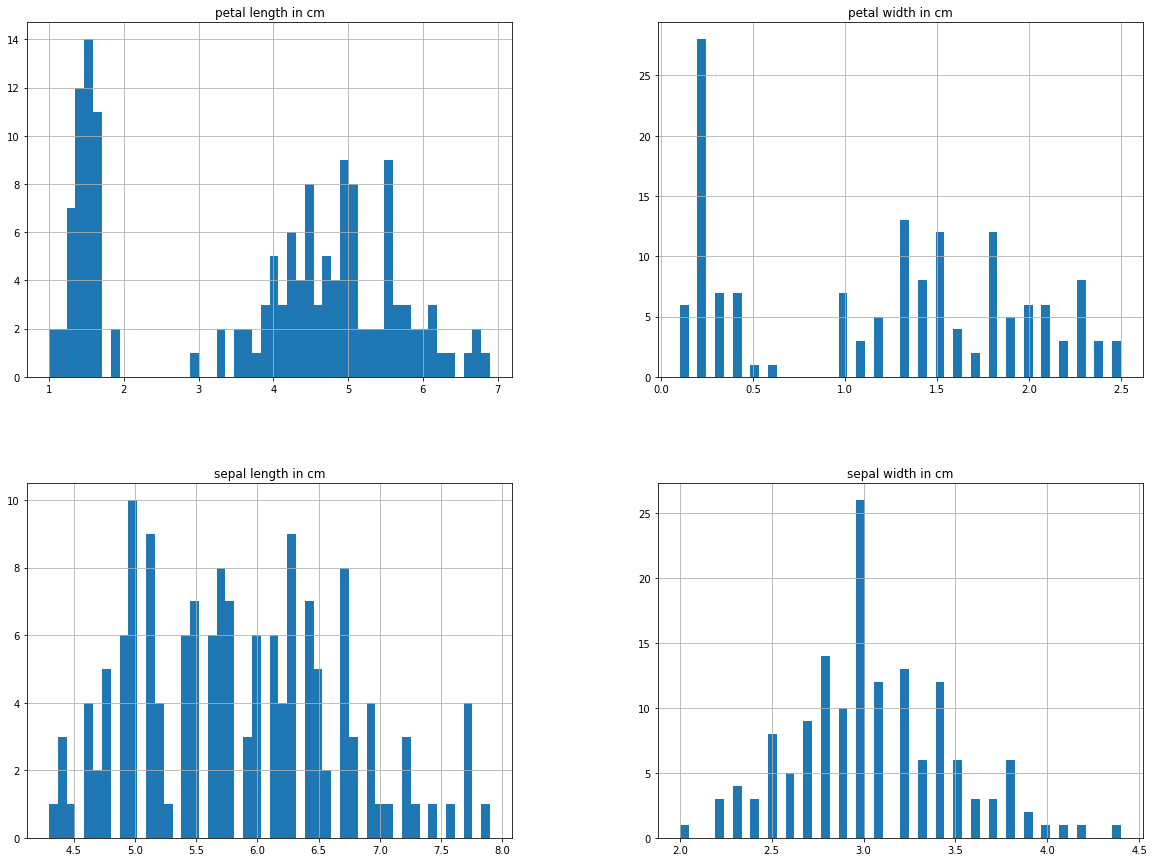

In [24]:
%matplotlib inline 
import matplotlib.pyplot as plt
iris.hist(bins=50, figsize=(20,15)) #bins = division
plt.show()

In [10]:
type(iris)

pandas.core.frame.DataFrame

## Dividindo em conjunto de treino e teste

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(iris, test_size=0.2, random_state=42)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(iris, iris["class"]):
    strat_train_set = iris.loc[train_index]
    strat_test_set = iris.loc[test_index]


## Verificando o test set

In [14]:
iris["class"].value_counts() / len(iris)

Iris-versicolor    0.333333
Iris-setosa        0.333333
Iris-virginica     0.333333
Name: class, dtype: float64

In [15]:
strat_test_set["class"].value_counts() / len(strat_test_set)

Iris-virginica     0.333333
Iris-versicolor    0.333333
Iris-setosa        0.333333
Name: class, dtype: float64

##  Visualizando os dados

In [30]:
iris = strat_train_set.copy()

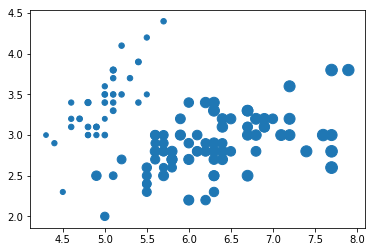

In [31]:
plt.scatter(iris["sepal length in cm"],iris["sepal width in cm"],sizes=20*iris['petal length in cm'])

In [36]:
def specie_color(x):
    if x == 'Iris-setosa':
        return 0
    elif x == 'Iris-versicolor':
        return 1
    else: 
        return 2

In [37]:
iris['specie_number'] = iris['class'].apply(specie_color)

In [46]:
iris.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,specie_number
8,4.4,2.9,1.4,0.2,0
106,4.9,2.5,4.5,1.7,2
76,6.8,2.8,4.8,1.4,1
9,4.9,3.1,1.5,0.1,0
89,5.5,2.5,4.0,1.3,1


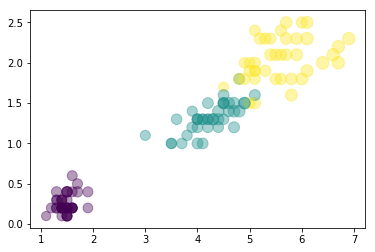

In [56]:
plt.scatter(iris["petal length in cm"],iris["petal width in cm"],sizes=20*iris['sepal length in cm']
            ,c=iris['specie_number'],cmap ='viridis',alpha=0.4)

In [45]:
del iris['class']

## Olhando para as correlações

In [47]:
corr_matrix = iris.corr()

In [48]:
corr_matrix["specie_number"].sort_values(ascending=False)

specie_number         1.000000
petal width in cm     0.959387
petal length in cm    0.951013
sepal length in cm    0.792204
sepal width in cm    -0.388647
Name: specie_number, dtype: float64

In [51]:
from pandas.tools.plotting import scatter_matrix

C:\Users\Jonathas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


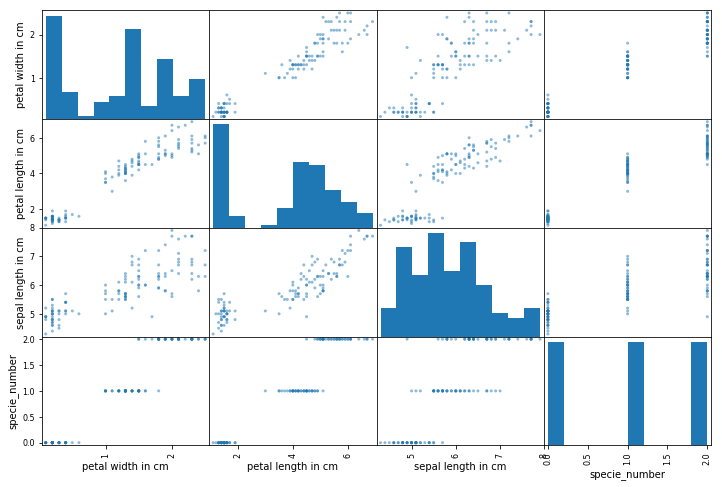

In [55]:
attributes = ["petal width in cm", "petal length in cm", "sepal length in cm",
              "specie_number"]
scatter_matrix(iris[attributes], figsize=(12, 8))
plt.show()

## Experimentando outras features

In [66]:
iris['soma'] = iris['petal length in cm'] + iris['petal width in cm']

In [67]:
iris.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,specie_number,soma
8,4.4,2.9,1.4,0.2,0,1.6
106,4.9,2.5,4.5,1.7,2,6.2
76,6.8,2.8,4.8,1.4,1,6.2
9,4.9,3.1,1.5,0.1,0,1.6
89,5.5,2.5,4.0,1.3,1,5.3


In [68]:
corr_matrix = iris.corr()

In [69]:
corr_matrix["specie_number"].sort_values(ascending=False)

specie_number         1.000000
soma                  0.960948
petal width in cm     0.959387
petal length in cm    0.951013
sepal length in cm    0.792204
sepal width in cm    -0.388647
Name: specie_number, dtype: float64

## Preparando os dados

In [145]:
strat_train_set['class'] = strat_train_set['class'].apply(specie_color)
iris = strat_train_set.drop("class", axis=1)
iris_labels = strat_train_set["class"].copy()

In [146]:
iris.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3


In [217]:
iris_labels

8      0
106    2
76     1
9      0
89     1
146    2
94     1
133    2
135    2
117    2
105    2
78     1
60     1
67     1
92     1
29     0
19     0
108    2
137    2
31     0
72     1
46     0
131    2
25     0
81     1
103    2
111    2
26     0
121    2
40     0
      ..
97     1
110    2
44     0
13     0
124    2
118    2
112    2
87     1
126    2
5      0
143    2
96     1
125    2
102    2
48     0
74     1
73     1
95     1
88     1
65     1
27     0
128    2
62     1
61     1
11     0
37     0
2      0
33     0
52     1
3      0
Name: class, Length: 120, dtype: int64

In [147]:
strat_train_set.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
8,4.4,2.9,1.4,0.2,0
106,4.9,2.5,4.5,1.7,2
76,6.8,2.8,4.8,1.4,1
9,4.9,3.1,1.5,0.1,0
89,5.5,2.5,4.0,1.3,1


## Alguns testes

In [148]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")
imputer.fit(iris)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [149]:
X = imputer.transform(iris)

## Algumas transformações

In [150]:
from sklearn.base import BaseEstimator, TransformerMixin

In [151]:
petal_lenght_ix, petal_width_ix = 2, 3

class CombinedAttributesAdder(BaseEstimator, TransformerMixin): 
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        petal_sum = X[:, petal_lenght_ix] + X[:, petal_width_ix]
        return np.c_[X, petal_sum]


In [152]:
attr_adder = CombinedAttributesAdder()
iris_extra_attribs = attr_adder.transform(iris.values)

In [153]:
iris_extra_attribs

array([[ 4.4,  2.9,  1.4,  0.2,  1.6],
       [ 4.9,  2.5,  4.5,  1.7,  6.2],
       [ 6.8,  2.8,  4.8,  1.4,  6.2],
       [ 4.9,  3.1,  1.5,  0.1,  1.6],
       [ 5.5,  2.5,  4. ,  1.3,  5.3],
       [ 6.3,  2.5,  5. ,  1.9,  6.9],
       [ 5.6,  2.7,  4.2,  1.3,  5.5],
       [ 6.3,  2.8,  5.1,  1.5,  6.6],
       [ 7.7,  3. ,  6.1,  2.3,  8.4],
       [ 7.7,  3.8,  6.7,  2.2,  8.9],
       [ 7.6,  3. ,  6.6,  2.1,  8.7],
       [ 6. ,  2.9,  4.5,  1.5,  6. ],
       [ 5. ,  2. ,  3.5,  1. ,  4.5],
       [ 5.8,  2.7,  4.1,  1. ,  5.1],
       [ 5.8,  2.6,  4. ,  1.2,  5.2],
       [ 4.7,  3.2,  1.6,  0.2,  1.8],
       [ 5.1,  3.8,  1.5,  0.3,  1.8],
       [ 6.7,  2.5,  5.8,  1.8,  7.6],
       [ 6.4,  3.1,  5.5,  1.8,  7.3],
       [ 5.4,  3.4,  1.5,  0.4,  1.9],
       [ 6.3,  2.5,  4.9,  1.5,  6.4],
       [ 5.1,  3.8,  1.6,  0.2,  1.8],
       [ 7.9,  3.8,  6.4,  2. ,  8.4],
       [ 5. ,  3. ,  1.6,  0.2,  1.8],
       [ 5.5,  2.4,  3.7,  1. ,  4.7],
       [ 6.3,  2.9,  5.6,

In [154]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [155]:
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

iris_num_tr = num_pipeline.fit_transform(iris)

In [156]:
iris_num_tr

array([[-1.72156775, -0.32483982, -1.34703555, -1.32016847, -1.34933   ],
       [-1.12449223, -1.22612948,  0.41429037,  0.65186742,  0.48975681],
       [ 1.14439475, -0.55016223,  0.58474127,  0.25746024,  0.48975681],
       [-1.12449223,  0.12580502, -1.29021859, -1.45163753, -1.34933   ],
       [-0.40800161, -1.22612948,  0.13020555,  0.12599118,  0.12993548],
       [ 0.54731923, -1.22612948,  0.6983752 ,  0.91480554,  0.76961785],
       [-0.2885865 , -0.77548465,  0.24383948,  0.12599118,  0.20989578],
       [ 0.54731923, -0.55016223,  0.75519216,  0.3889293 ,  0.64967741],
       [ 2.21913069, -0.0995174 ,  1.32336182,  1.44068178,  1.36932007],
       [ 2.21913069,  1.70306192,  1.66426361,  1.30921272,  1.56922081],
       [ 2.09971558, -0.0995174 ,  1.60744665,  1.17774366,  1.48926052],
       [ 0.18907392, -0.32483982,  0.41429037,  0.3889293 ,  0.40979652],
       [-1.00507713, -2.35274155, -0.15387928, -0.268416  , -0.1899057 ],
       [-0.04975629, -0.77548465,  0.1

## Treinando e calculando no conjunto de treinamento

### Com árvore

In [157]:
from sklearn.tree import DecisionTreeRegressor

In [158]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(iris_num_tr, iris_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [169]:
iris_predictions = tree_reg.predict(iris_num_tr)


array([ 0.,  2.,  1.,  0.,  1.,  2.,  1.,  2.,  2.,  2.,  2.,  1.,  1.,
        1.,  1.,  0.,  0.,  2.,  2.,  0.,  1.,  0.,  2.,  0.,  1.,  2.,
        2.,  0.,  2.,  0.,  0.,  1.,  1.,  0.,  2.,  2.,  1.,  1.,  2.,
        1.,  0.,  1.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,
        2.,  1.,  0.,  2.,  1.,  2.,  0.,  2.,  0.,  1.,  2.,  0.,  1.,
        1.,  2.,  1.,  1.,  2.,  0.,  0.,  0.,  2.,  1.,  2.,  1.,  2.,
        2.,  1.,  0.,  2.,  1.,  0.,  2.,  0.,  2.,  1.,  1.,  0.,  1.,
        2.,  0.,  0.,  2.,  2.,  2.,  1.,  2.,  0.,  2.,  1.,  2.,  2.,
        0.,  1.,  1.,  1.,  1.,  1.,  0.,  2.,  1.,  1.,  0.,  0.,  0.,
        0.,  1.,  0.])

In [172]:
np.sum(iris_labels - iris_predictions)/len(iris_predictions)

0.0

### Com cross validation

In [183]:
from sklearn.model_selection import cross_val_score

In [202]:
scores = cross_val_score(tree_reg, iris_num_tr, iris_labels,
                         scoring="accuracy", cv=10)


In [203]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [210]:
display_scores(scores)

Scores: [ 0.91666667  1.          1.          0.91666667  1.          0.91666667
  0.91666667  1.          0.91666667  1.        ]
Mean: 0.958333333333
Standard deviation: 0.0416666666667


### Com random forest

In [220]:
from sklearn.ensemble import RandomForestClassifier

In [221]:
forest_clas = RandomForestClassifier()

In [222]:
forest_clas.fit(iris_num_tr, iris_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [224]:
iris_predictions = forest_clas.predict(iris_num_tr)

In [225]:
np.sum(iris_labels - iris_predictions)/len(iris_predictions)

0.0

### Com random forest e cross validation

In [232]:
scores = cross_val_score(forest_clas, iris_num_tr, iris_labels,
                         scoring="accuracy", cv=10)

In [233]:
display_scores(scores)

Scores: [ 0.83333333  1.          1.          0.91666667  0.91666667  1.
  0.91666667  1.          1.          1.        ]
Mean: 0.958333333333
Standard deviation: 0.0559016994375


## Grid Search

In [234]:
from sklearn.model_selection import GridSearchCV

In [237]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4, 5]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4, 5]},
]

forest_clas = RandomForestClassifier()
grid_search = GridSearchCV(forest_clas, param_grid, cv=5,
                           scoring='accuracy')
grid_search.fit(iris_num_tr, iris_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4, 5]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [238]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 3}

In [239]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [241]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.958333333333 {'max_features': 2, 'n_estimators': 3}
0.958333333333 {'max_features': 2, 'n_estimators': 10}
0.958333333333 {'max_features': 2, 'n_estimators': 30}
0.941666666667 {'max_features': 3, 'n_estimators': 3}
0.95 {'max_features': 3, 'n_estimators': 10}
0.958333333333 {'max_features': 3, 'n_estimators': 30}
0.95 {'max_features': 4, 'n_estimators': 3}
0.95 {'max_features': 4, 'n_estimators': 10}
0.95 {'max_features': 4, 'n_estimators': 30}
0.941666666667 {'max_features': 5, 'n_estimators': 3}
0.95 {'max_features': 5, 'n_estimators': 10}
0.95 {'max_features': 5, 'n_estimators': 30}
0.966666666667 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.95 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.95 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.95 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.95 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
0.95 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
0.95833

In [242]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [243]:
feature_importances

array([ 0.13901   ,  0.01388889,  0.23210204,  0.17895299,  0.43604608])

In [258]:
iris.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3


In [259]:
final_model = grid_search.best_estimator_

In [260]:
strat_test_set['class'] = strat_test_set['class'].apply(specie_color)

In [262]:
X_test = strat_test_set.drop("class", axis=1)
y_test = strat_test_set["class"].copy()
X_test_prepared = num_pipeline.transform(X_test)

In [264]:
from sklearn.metrics import precision_score

In [279]:
final_predictions = final_model.predict(X_test_prepared)
final_mse = precision_score(y_test, final_predictions,average='micro')

In [280]:
final_mse

0.90000000000000002